# Лабораторная работа №1.  ДВПФ и ДПФ

В данной работе используются значения варианта №5.

In [2]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.gridspec  import GridSpec

import warnings
warnings.filterwarnings('ignore')

def __plot_uniform_signal(axes, x, y, label, format="o"):
    axes.plot(x, y, format, label=label)

def __plot_discrete_signal(axes, x, y, label, format="o"):
    axes.stem(x, y, format, label=label)
    axes.set_xticks(x)

def plot_signal(x, y, label="", format="o", gridspec=None, figure=None, subplot_row=0, subplot_col=0, ncols=1, nrows=1,
                figsize=(6, 4), title="Signal plot", xlabel="$k$", ylabel="$x[k]$", uniform=False):
    if figure == None:
        figure = plt.figure(figsize=figsize, dpi=120)
    if gridspec == None:
        gridspec = GridSpec(ncols=ncols, nrows=nrows, figure=figure)

    axes = figure.add_subplot(gridspec[subplot_row, subplot_col])
    axes.minorticks_on()
    axes.grid(which='major', linewidth=2)
    axes.grid(which='minor', linestyle=':')

    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)

    if uniform == True:
        __plot_uniform_signal(axes, x, y, label, format)
    else:
        __plot_discrete_signal(axes, x, y, label, format)

    axes.legend()

    return figure, gridspec, axes

In [3]:
def dtft(x, M=1024):
    return -0.5 + np.arange(M) / M, np.fft.fftshift(np.fft.fft(x, M))

In [4]:
def __plot_analyses(x, y, signame, title_formatter, ylabel_formatter, xlabel, uniform=False, real_imag=False):
    assert len(x) == len(y)
    y[np.abs(y) < 1e-10] = 0

    fig, gs, ax = plot_signal(x, np.abs(y), format="", label="", title=f"$Модуль \; {title_formatter(signame)}$",
                              xlabel=xlabel, ylabel=f"$|{ylabel_formatter(signame)}|$",
                              nrows=4, figsize=(7, 7), uniform=uniform)
    fig, gs, ax = plot_signal(x, np.angle(y), format="", label="", title=f"$Фаза \; {title_formatter(signame)}$", \
                              xlabel=xlabel, ylabel=f"$\\varphi({ylabel_formatter(signame)})$",
                              subplot_row=1, gridspec=gs, figure=fig, uniform=uniform)

    if real_imag == True:
        fig, gs, ax = plot_signal(x, np.real(y), format="", label="", title=f"$Real \; {title_formatter(signame)}$",
                                  xlabel=xlabel, ylabel=f"$real({ylabel_formatter(signame)})$",
                                  subplot_row=2, gridspec=gs, figure=fig, uniform=uniform)
        fig, gs, ax = plot_signal(x, np.imag(y), format="", label="", title=f"$Imag \; {title_formatter(signame)}$",
                                  xlabel=xlabel, ylabel=f"$imag({ylabel_formatter(signame)})$",
                                  subplot_row=3, gridspec=gs, figure=fig, uniform=uniform)

    fig.tight_layout()


In [1]:
def plot_analyses(k, x, signame, real_imag=False, uniform=False):
    def ylabel_formatter(name):
        return f"{name.lower()}[k]"

    def title_formatter(name):
        return f"сигнала \; {name.lower()}[k]"

    __plot_analyses(k, x, signame, title_formatter, ylabel_formatter, xlabel="$k$", real_imag=real_imag, uniform=uniform)

<>:6: SyntaxWarning: invalid escape sequence '\;'
<>:6: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_44179/1512885511.py:6: SyntaxWarning: invalid escape sequence '\;'
  return f"сигнала \; {name.lower()}[k]"


In [5]:
def plot_analyses_dtft(nu, X, signame, real_imag=False):
    def ylabel_formatter(name):
        return f"{name.upper()}(\\nu)"

    def title_formatter(name):
        return f"ДВПФ \; {name.lower()}[k]"

    __plot_analyses(nu, X, signame, title_formatter, ylabel_formatter, xlabel="$\\nu$", real_imag=real_imag, uniform=True)

In [7]:
def plot_analyses_dft(n, X, signame, real_imag=False):
    def ylabel_formatter(name):
        return f"{name.upper()}[n]"

    def title_formatter(name):
        return f"ДПФ \; {name.lower()}[k]"

    __plot_analyses(n, X, signame, title_formatter, ylabel_formatter, xlabel="$n$", real_imag=real_imag, uniform=False)

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:| 
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |  7 |  7 |  5 |  5 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  


$$X(\nu )=\sum\limits_{k=-\infty }^{\infty }{x}[k]\exp (-j2\pi \nu k)=\sum\limits_{k=0}^{N-1}{\exp (-j2\pi \nu k)}=\frac{1-\exp (-j2\pi \nu N)}{1-\exp (-j2\pi \nu )}=$$
$$=\frac{{{e}^{-j\pi \nu N}}}{{{e}^{-j\pi \nu }}}\frac{({{e}^{j\pi \nu N}}-{{e}^{-j\pi \nu N}})}{({{e}^{j\pi \nu }}-{{e}^{-j\pi \nu }})}=\frac{\sin (N\pi \nu )}{\sin (\pi \nu )}\exp (-j(N-1)\pi \nu ).$$

$$Y(\nu )=\sum\limits_{k=-\infty }^{\infty }{x}[k]\exp (-j2\pi \nu k)\cos\left(2\pi k\dfrac{n_0}{N}\right) = \sum\limits_{k=-\infty }^{\infty }{x}[k]\exp (-j2\pi \nu k) \frac{1}{2}\left( \exp (+j2\pi k\dfrac{n_0}{N}) + \exp (-j2\pi k\dfrac{n_0}{N}) \right)=$$
$$=\frac{1}{2}\left( X(\nu - \dfrac{n_0}{N}) + X(\nu + \dfrac{n_0}{N}) \right)$$

Построить графики последовательностей $x[k]$ и $y[k]$.

In [8]:
import numpy as np
import scipy as sp

N = 13
n_0 = 4
nu_0 = n_0 / N

In [9]:
x = np.ones(N)
k = np.arange(x.size)
y = x * np.cos(2 * np.pi * k * n_0 / N)

print('x =', x)
print('y =', y)
print('k =', k)

x = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
y = [ 1.         -0.35460489 -0.74851075  0.88545603  0.12053668 -0.97094182
  0.56806475  0.56806475 -0.97094182  0.12053668  0.88545603 -0.74851075
 -0.35460489]
k = [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


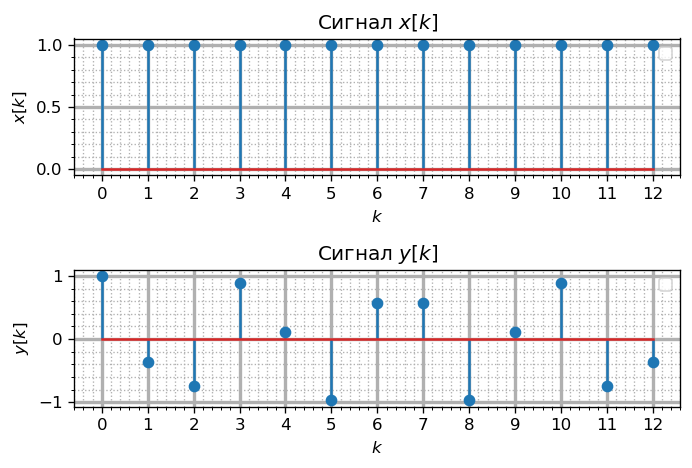

In [10]:
fig, gs, ax = plot_signal(k, x, format="o", label="", title="Сигнал $x[k]$", xlabel="$k$", ylabel="$x[k]$",
                          nrows=2, figsize=(6, 4))
fig, gs, ax = plot_signal(k, y, format="o", label="", title="Сигнал $y[k]$", xlabel="$k$", ylabel="$y[k]$",
                          subplot_row=1, gridspec=gs, figure=fig)
fig.tight_layout()

Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;


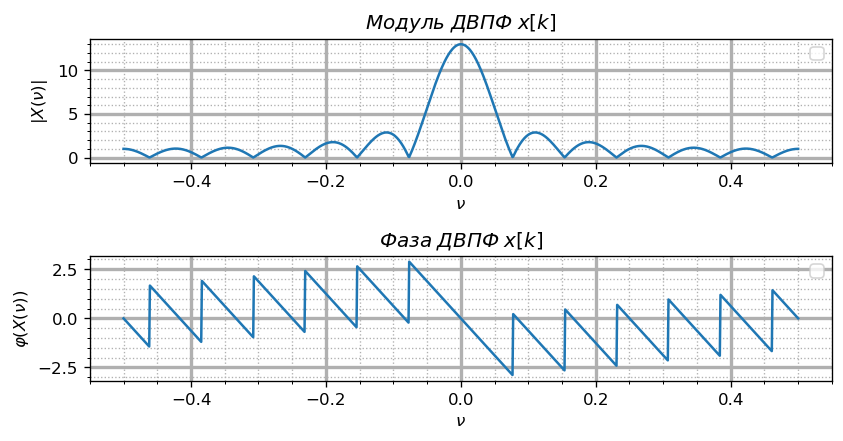

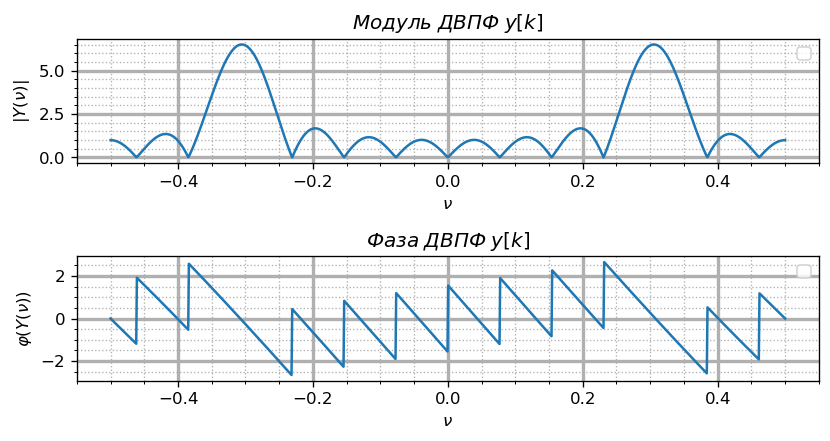

In [11]:
nu = np.linspace(-0.5, 0.5, 1000)

def get_X(nu):
    return np.sin(N * np.pi * nu) / np.sin(np.pi * nu) * np.exp(-1j * (N - 1) * np.pi * nu)

def get_Y(nu, nu_0):
    return 1/2 * (get_X(nu - nu_0) + get_X(nu + nu_0))

plot_analyses_dtft(nu, get_X(nu), signame="x")
plot_analyses_dtft(nu, get_Y(nu, nu_0), signame="y")

* б) используя функцию ```np.fft.fft()```.

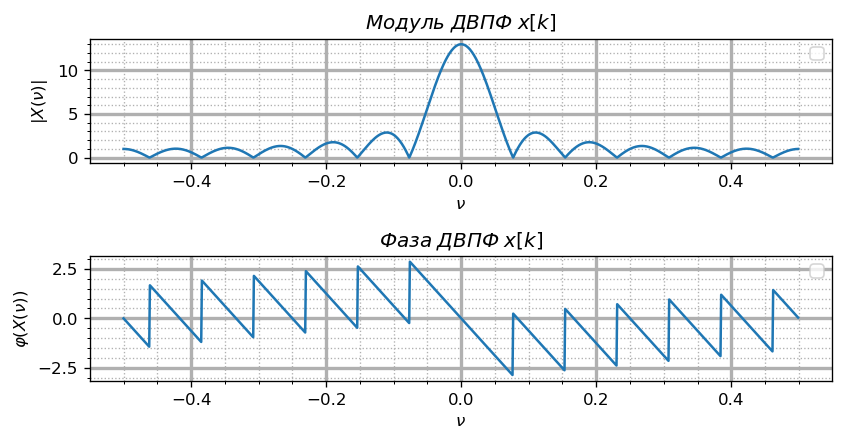

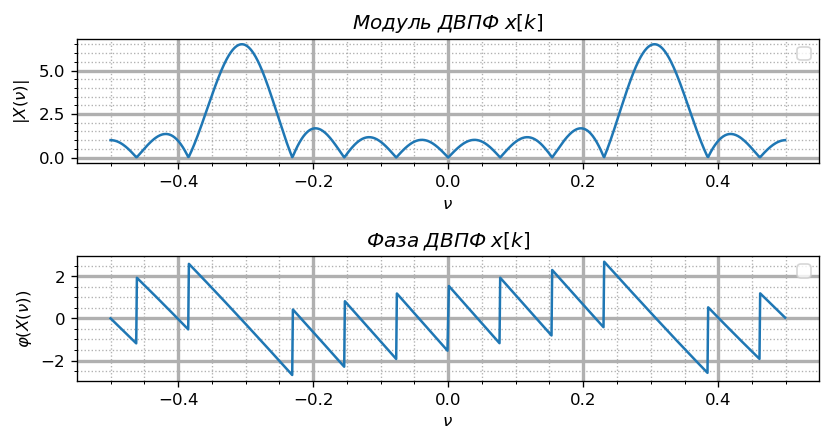

In [12]:
nu, X = dtft(x, 1000)
nu, Y = dtft(y, 1000)

plot_analyses_dtft(nu, X, signame="x")
plot_analyses_dtft(nu, Y, signame="x")

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

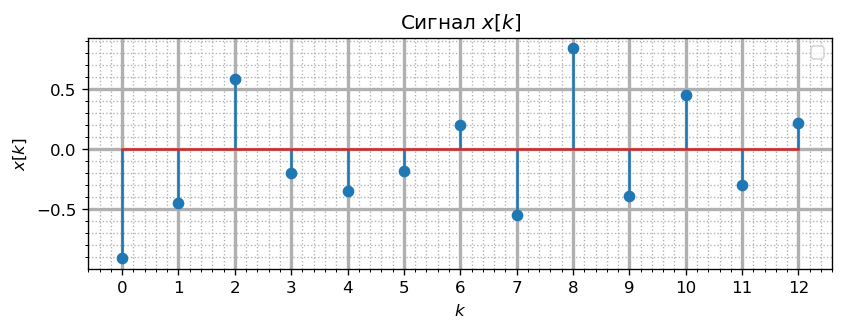

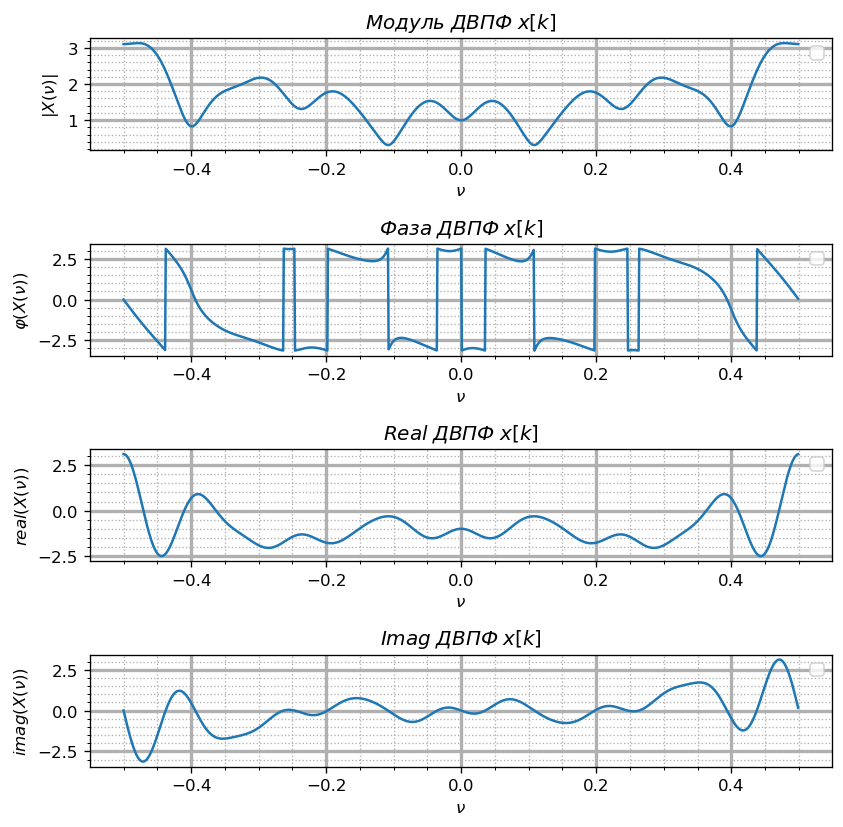

In [13]:
N = 13
k = np.arange(N)
x = np.random.uniform(-1,1, N) * np.ones(N)

fig, gs, ax = plot_signal(k, x, format="o", label="", title="Сигнал $x[k]$", xlabel="$k$", ylabel="$x[k]$",
                          figsize=(8, 2.5))
nu, X = dtft(x)
plot_analyses_dtft(nu, X, signame="x", real_imag=True)

# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |
|**7**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.3\;\;0.4\;\;0.5\;\;0.6\;\;0.7\;\;0.8\}$$|  -5  |  8  |
|**8**|$$\{\underbrace{0.8}_{k=0}\;\;0.7\;\;0.6\;\;0.5\;\;0.4\;\;0.3\;\;0.2\;\;0.1\}$$|  5  |  8  |
|**9**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.4\;\;0.8\;\;1.6\;\;3.2\;\;6.4\;\;12.8\}$$|  7  |  8  |
|**10**|$$\{\underbrace{12.8}_{k=0}\;\;6.4\;\;3.2\;\;1.6\;\;0.8\;\;0.4\;\;0.2\;\;0.1\}$$|  -7  |  8  |

Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.


По теореме смещения:
$$
Y[n] = X[\left( n + n_0\right) \mod l] \Rightarrow 
y[k] = x[k] \cdot \exp{\left( -j \cdot 2 \pi k \cdot \frac{n_0}{l} \right)}
$$

2) Проведите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

In [14]:
n_0, l = -4, 8
k = np.arange(l)
x = np.array([4.1, 3.5, 1.2, 5.0, 3.0, 2.3, 5.3, 2.1])
y = x * np.exp(-1j * 2 * np.pi * k * n_0 / l)

X = np.fft.fft(x) # DFT of x
Y = np.roll(X, n_0)
Y_inv = np.fft.ifft(Y)

[ 4.1+0.00000000e+00j -3.5+4.28626380e-16j  1.2-2.93915232e-16j
 -5. +1.83697020e-15j  3. -1.46957616e-15j -2.3+1.40834382e-15j
  5.3-3.89437682e-15j -2.1+1.80023079e-15j] [ 4.1+0.j -3.5+0.j  1.2+0.j -5. +0.j  3. +0.j -2.3+0.j  5.3+0.j -2.1+0.j]


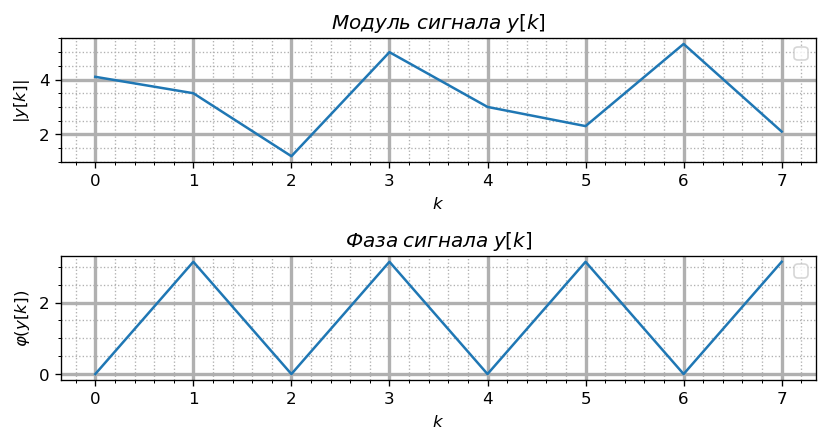

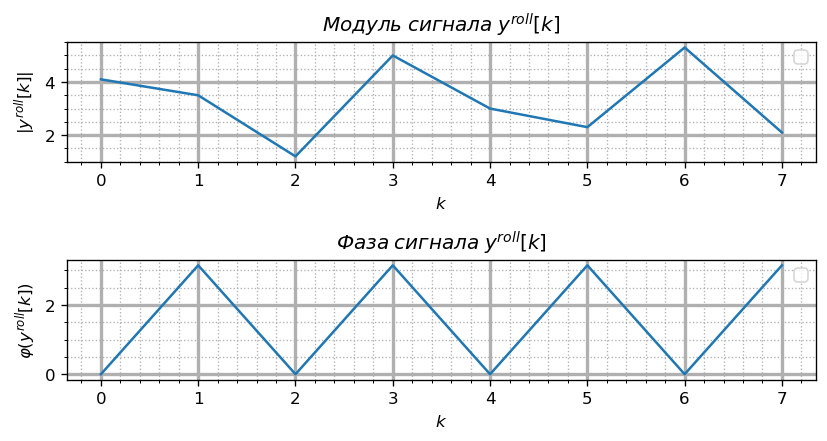

In [15]:
print(y, Y_inv)
plot_analyses(k, y, signame="y", uniform=True)
plot_analyses(k, Y_inv, signame="y^{roll}", uniform=True)

## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |
|  **7**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **8**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **9**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **10**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 12-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 12
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


Найдём значения в ДПФ.
Для действительной последовательности $x[k]$ верно, что
$$
\left\lbrace 
\begin{matrix}
x[k] = x^{*}[k]\\
x[k] \leftrightarrow^{DFT} X^{*}[N - n]_N
\end{matrix}
\right. \Rightarrow
X[n] = X^{*}[N - n]_N
$$
Таким образом, получаем:
$$
\begin{align*}
X[0] &= X^{*}[0] = 11 \\
X[11] &= X^{*}[1] = -4 + 5j\\
X[10] &= X^{*}[2] = 8 + 3j\\
X[9] &= X^{*}[3] = -2 - 9j\\
X[8] &= X^{*}[4] = -3 - 8j\\
X[7] &= X^{*}[5] = 2 + 9j\\
X[6] &= X^{*}[6] = -4
\end{align*}
$$

$$
X[n] =  \sum_{k=0}^{N-1} x[k] \cdot \exp{\left( 
  -j \cdot 2 \pi k \frac{n}{N}
\right)} \Rightarrow X[0] = \sum_{k=0}^{N-1} x[k] \cdot 1 = \sum_{k=0}^{N-1} x[k]
$$
Таким образом
$$
\frac{1}{N}\sum_{k=0}^{N-1} x[k] = \frac{X[0]}{N} = \frac{11}{12} \approx 0.917
$$

Используем равенство Парсеваля:
$$
\sum_{k=0}^{N-1} \left| x[k] \right|^2 = \frac{1}{N} \sum_{n=0}^{N-1} \left| X[n] \right|^2
$$
Получаем для энергии сигнала:
$$
\frac{1}{12} \sum_{n=0}^{11} \left| X[n] \right|^2 = 
\frac{1}{12} \left(
121 + 41 + 73 + 85 + 73 + 
\right. \\ \left. 85 + 16 + 85 + 73 + 85 + 73 + 41
\right)  = \frac{851}{12} \approx 70.92
$$
Мощность сигнала:
$$
\frac{1}{N}\sum_{k=0}^{N-1} \left| x[k] \right|^2 = 
\frac{1}{N^2} \sum_{n=0}^{N-1} \left| X[n] \right|^2 = \frac{851}{12^2} \approx 5.91
$$

In [16]:
part = np.array([-4 - 5j, 8 -3j, -2  + 9j, -3 - 8j, 2 + 9j])

X = np.append(np.append(np.append(np.array([11]), part), [-4]), np.conj(np.flip(part)))
print(X)
x = np.fft.ifft(X)

print(f"Среднее: {np.mean(x)}")
print(f"Энергия: {np.sum(np.abs(x)**2)}")
print(f"Мощность: {np.mean(np.abs(x)**2)}")

[11.+0.j -4.-5.j  8.-3.j -2.+9.j -3.-8.j  2.+9.j -4.+0.j  2.-9.j -3.+8.j
 -2.-9.j  8.+3.j -4.+5.j]
Среднее: (0.9166666666666666+0j)
Энергия: 70.91666666666664
Мощность: 5.9097222222222205


## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |  5 |  7 |  5 |  5 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$ (на самом деле это следствие первого пункта)
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

Прямая формула:
$$
X[n] = \sum_{k=0}^{N-1} x[k] \cdot \exp{
  \left(
    -j \cdot 2 \pi k \frac{n}{N}
  \right) 
} = \\
\sum_{k=0}^{N-1} \cos{\left(2 \pi k \frac{r_1}{N}\right)} \cdot \exp{
  \left(
    -j \cdot 2 \pi k \frac{n}{N}
  \right) 
} + 
\sum_{k=0}^{N-1} \sin{\left(2 \pi k \frac{r_2}{N} \right)} \cdot \exp{
  \left(
    -j \cdot 2 \pi k \frac{n}{N}
  \right) 
} = \\
\sum_{k=0}^{17} \cos{\left(\frac{2\pi}{18} 7k\right)}  \cdot \exp{
  \left(
    -j \frac{2 \pi}{18} nk
  \right) 
} + 
\sum_{k=0}^{17} \sin{\left(\frac{2\pi}{18}5k\right)} \cdot \exp{
  \left(
    -j \frac{2\pi}{18}nk
  \right) 
} = \\
\sum_{k=0}^{17} \frac{1}{2} \exp{\left(j\frac{2\pi}{18} 7k\right)}  \cdot \exp{
  \left(
    -j \frac{2 \pi}{18} nk
  \right) 
} + 
\sum_{k=0}^{17} \frac{1}{2} \exp{\left(-j\frac{2\pi}{18} 7k\right)}  \cdot \exp{
  \left(
    -j \frac{2 \pi}{18} nk
  \right) 
} + \\
\sum_{k=0}^{17} \frac{1}{2j}\exp{\left(j\frac{2\pi}{18}5k\right)} \cdot \exp{
  \left(
    -j \frac{2\pi}{18}nk
  \right) 
} - 
\sum_{k=0}^{17} \frac{1}{2j}\exp{\left(-j\frac{2\pi}{18}5k\right)} \cdot \exp{
  \left(
    -j \frac{2\pi}{18}nk
  \right) 
} = \\
\frac{1}{2} \left(\sum_{k=0}^{17} \exp{
  \left(
    -j \frac{2 \pi}{18} \left(n - 7\right)k
  \right) 
} + 
\sum_{k=0}^{17} \exp{
  \left(
    -j \frac{2 \pi}{18} \left(n + 7\right)k
  \right) 
}\right) + \\ 
\frac{1}{2j} \left(\sum_{k=0}^{17} \exp{
  \left(
    -j \frac{2 \pi}{18} \left(n -5\right)k
  \right) 
} -
\sum_{k=0}^{17} \exp{
  \left(
    -j \frac{2 \pi}{18} \left(n +5\right)k
  \right) 
}
\right)
$$
Для суммы вида $\sum_{k=0}^{15} \exp{
  \left(
    -j \frac{2 \pi}{16} mk
  \right) 
}$ нужно, чтобы $m$ равнялось $0$ или было кратно $N$, иначе она обращается в ноль по формуле суммы геометрической прогрессии, таким образом, получаем бины ДПФ:

$$
\left\lbrace 
\begin{matrix}
X[5] &= -9j\\
X[7] &= 9\\
X[11] &= 9\\
X[13] &= 9j
\end{matrix}
\right.
$$

Теорема смещения:
$$
\sum_{m=0}^{15} \mathbb{1}[k - m]
\left(\cos{\left(\frac{2\pi}{18} 7k\right)} + \sin{\left(\frac{2\pi}{18}5k\right)}\right) = \\
\frac{1}{2}\sum_{m=0}^{17}\mathbb{1}[k - m]
\exp{\left(j\frac{2\pi}{18} 7k\right)} +
\frac{1}{2}\sum_{m=0}^{17} \mathbb{1}[k - m]
\exp{\left(-j\frac{2\pi}{18} 7k\right)} + \\
\frac{1}{2j}\sum_{m=0}^{17}\mathbb{1}[k - m]
\exp{\left(j\frac{2\pi}{18} 5k\right)} -
\frac{1}{2j}\sum_{m=0}^{17} \mathbb{1}[k - m]
\exp{\left(-j\frac{2\pi}{18} 5k\right)}
$$

Зная, что ДПФ $N$ единичных импульсов имеет только один ненулевой бин $W[0] = N$, а также используя теорему смещения, получаем:
$$
\left\lbrace 
\begin{matrix}
X[5] &= -9j\\
X[7] &= 9\\
X[11] &= 9\\
X[13] &= 9j
\end{matrix}
\right.
$$

Остальные бины ДПФ нулевые.

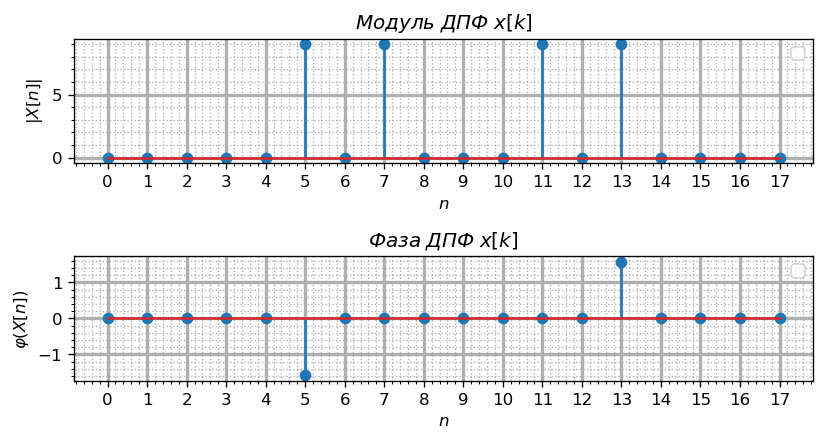

In [17]:
N, r1, r2 = 18, 7, 5
k = np.arange(N)
x = np.cos(2 * np.pi / N * r1 * k) + np.sin(2 * np.pi / N * r2 * k)

X = np.fft.fft(x)
plot_analyses_dft(k, X, signame="x")

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
## Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 | 20 | 24 | 30 | 32 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



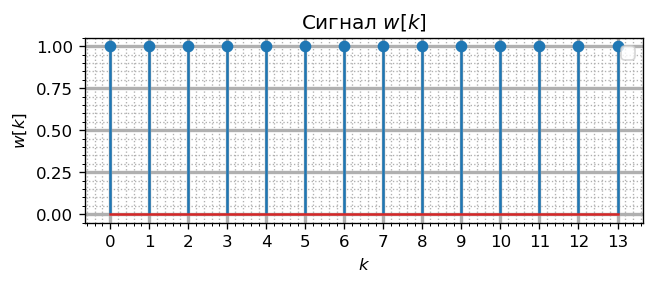

In [18]:
N = 14
k = np.arange(N)
w = np.ones(N)

fig, gs, ax = plot_signal(k, w, format="o", label="", title="Сигнал $w[k]$", xlabel="$k$", ylabel="$w[k]$",
                          figsize=(6, 2))

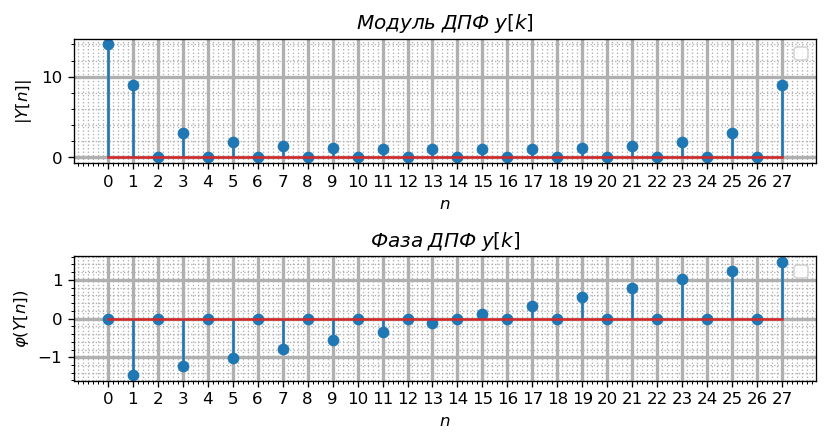

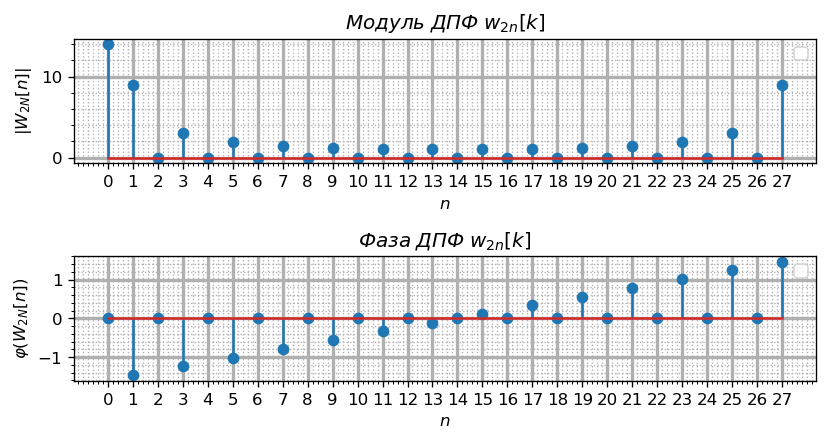

In [19]:
y = np.append(w, np.zeros(N))
Y = np.fft.fft(y)
W = np.fft.fft(w, 2 * N)

plot_analyses_dft(np.arange(2 * N), Y, signame="y")
plot_analyses_dft(np.arange(2 * N), W, signame="w_{2N}")

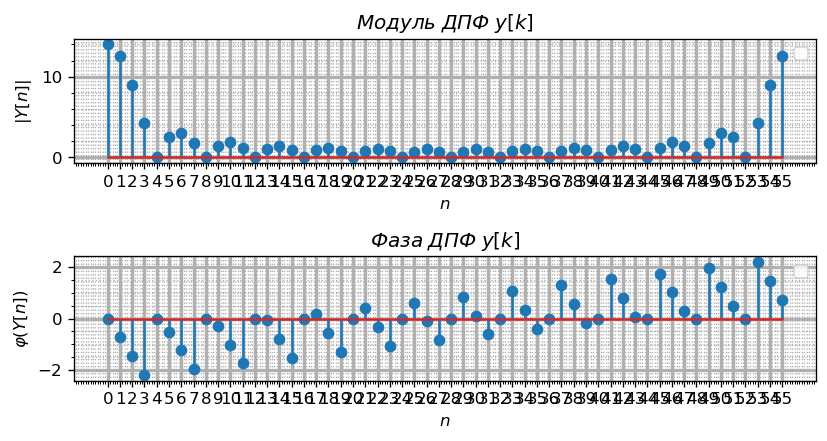

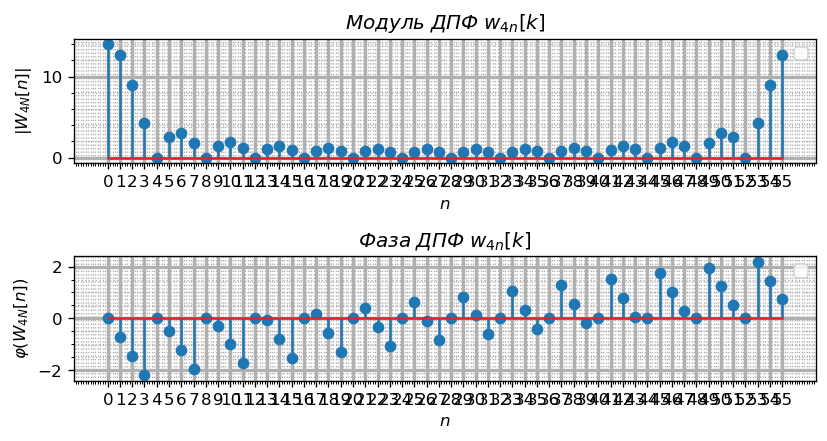

In [20]:
y = np.append(w, np.zeros(3 * N))
Y = np.fft.fft(y)
W = np.fft.fft(w, 4 * N)

plot_analyses_dft(np.arange(4 * N), Y, signame="y")
plot_analyses_dft(np.arange(4 * N), W, signame="w_{4N}")

Вычислим ДВПФ:
$$
W(\nu) = \sum_{k=-\infty}^{k=\infty} w[k] \cdot \exp{\left(-j2\pi\nu k \right)} = 
\sum_{k=0}^{15} \exp{\left(-j2\pi\nu k \right)} = \\
= \exp{\left(-j\left(N - 1\right) \nu\pi\right)}
\frac{
  \sin{N\pi\nu}
}
{\sin{\pi\nu}}
$$

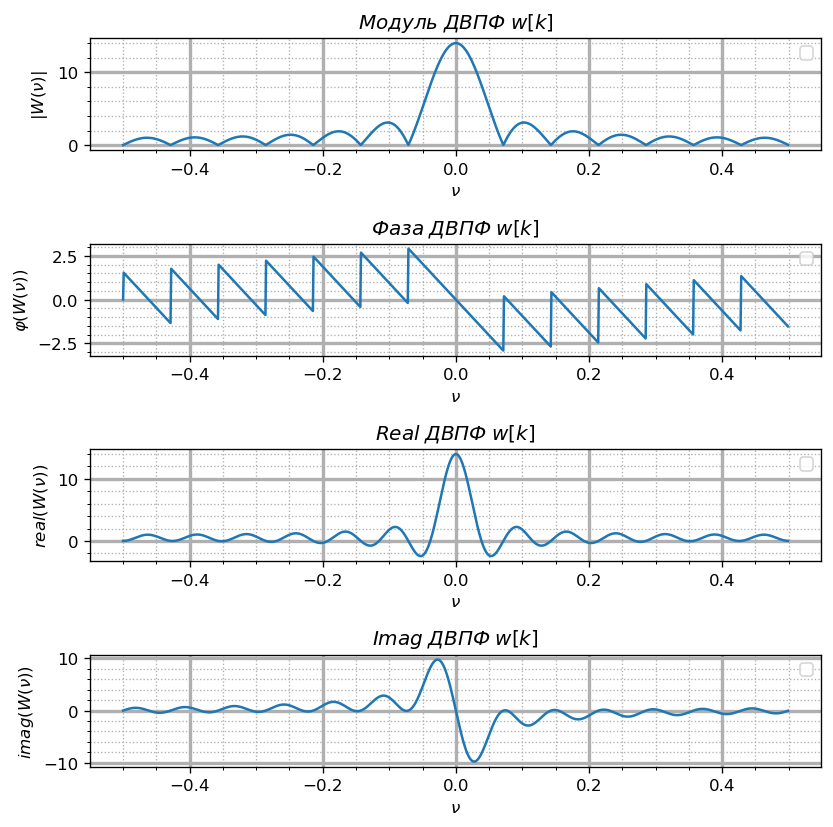

In [21]:
nu, W = dtft(w)
plot_analyses_dtft(nu, W, signame="w", real_imag=True)

## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

$$
x[k] = 
\sin{\left(2 \pi k \frac{6}{14}\right)}+ 
 \cos{\left(2 \pi k \frac{4}{14} \right)} = \\
\frac{1}{2j} \exp{\left(j2 \pi k \frac{6}{14}\right)}- 
\frac{1}{2j} \exp{\left(-j2 \pi k \frac{6}{14}\right)}+ \\
\frac{1}{2} \exp{\left(j2 \pi k \frac{4}{14} \right)} +
\frac{1}{2} \exp{\left(-j2 \pi k \frac{4}{14} \right)}
$$
Откуда для ДВПФ получим:
$$
X(\nu) = \sum_{n=-\infty}^{\infty} 
\left(
\frac{1}{2j} \delta{\left(\nu - \frac{6}{14} - n\right)} -
\frac{1}{2j} \delta{\left(\nu + \frac{6}{14} - n\right)} \right.\\
\left.
\frac{1}{2}\delta{\left(\nu - \frac{4}{14} - n\right)} +
\frac{1}{2}\delta{\left(\nu + \frac{4}{14} - n\right)}
\right)
$$

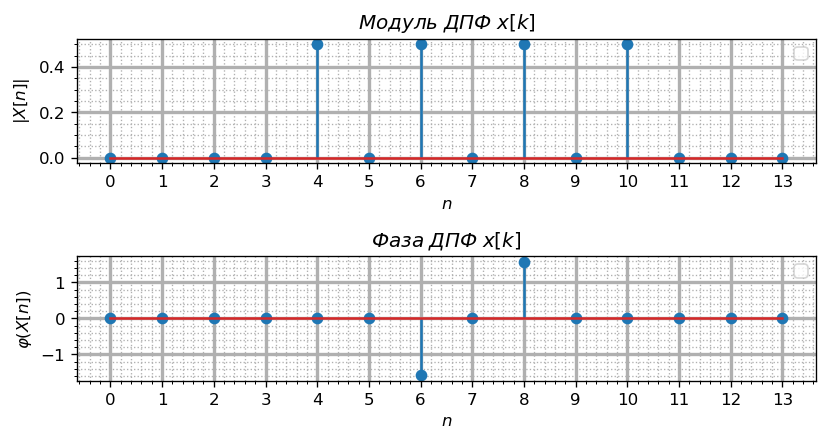

In [22]:
N, r1, r2 = 14, 6, 4

k = np.arange(N)
x = np.sin(2 * np.pi * k * r1 / N) + np.cos(2 * np.pi * k * r2 / N)

X = np.fft.fft(x) / N
plot_analyses_dft(k, X, signame="x")

## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

In [23]:
import time

N, P = 512, 32768 // 2
n0 = 100
k = np.arange(P)
x = np.sin(2 * np.pi * k * n0 / N)

In [24]:
nu = np.arange(P) / P
X1 = np.zeros(P, dtype=np.complex128)

start = time.time()
for n in range(P):
    X1[n] += np.dot(np.exp(-1j * k * 2 * np.pi * n / P), x)

print("Time:", time.time() - start, "c")

Time: 3.8072361946105957 c


In [25]:
start = time.time()
X2 = np.fft.fft(x, P)
print("Time ", time.time() - start, "c")

Time  0.00029540061950683594 c


In [26]:
print("Максимальная ошибка:", max(abs(X1 - X2)))

Максимальная ошибка: 1.3222761891733543e-08


## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|


| Варианты: |    7 |    8 |    9 |    10 |
|:---------:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

In [27]:
import scipy.io.wavfile
from IPython.display import Audio

wav_file_name = "../wav_files/guitar.wav"

fs, x = scipy.io.wavfile.read(wav_file_name)
print(f"Частота дискретизации: {fs} Гц")
print(f"Шаг дискретизации: {1/fs} с")
print(len(x))

Частота дискретизации: 44100 Гц
Шаг дискретизации: 2.2675736961451248e-05 с
639450


In [28]:
Audio(wav_file_name)

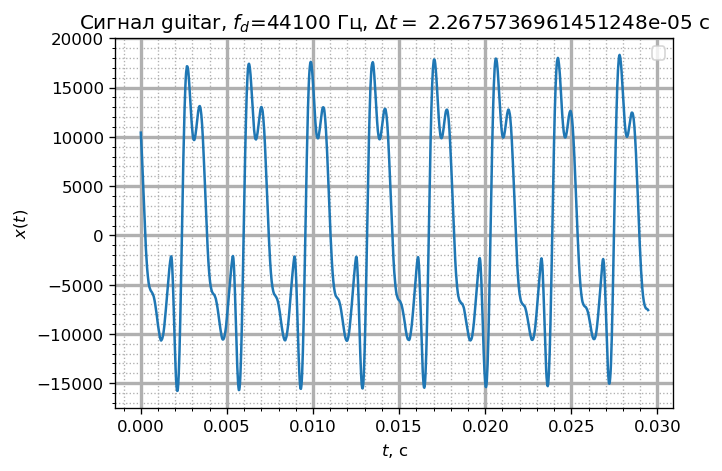

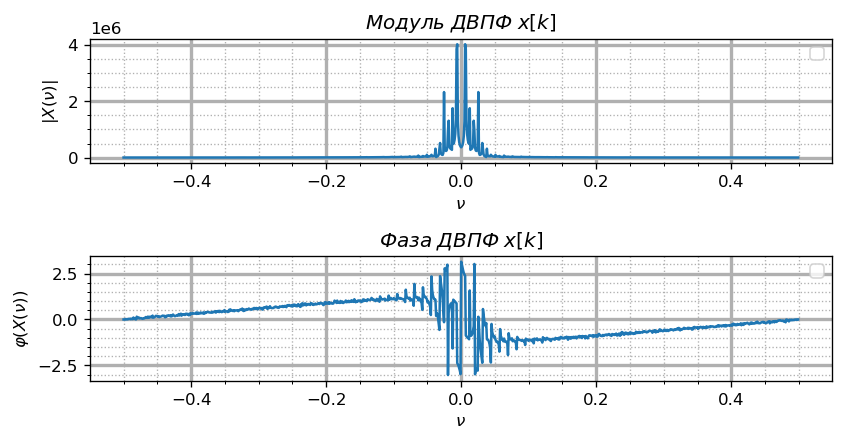

In [29]:
x_part = x[66000:67300]

fig, gs, ax = plot_signal(np.arange(x_part.size) / fs, x_part, format="-", label="",
                          title=f"Сигнал guitar, $f_d$={fs} Гц, $\Delta t=$ {1 / fs} c", xlabel="$t$, c", ylabel="$x(t)$",
                          figsize=(6, 4), uniform=True)

nu, X = dtft(x_part)
plot_analyses_dtft(nu, X, signame="x", real_imag=False)

In [31]:
print("Частота основного колебания:", np.abs(nu[np.argmax(np.abs(X))]) * fs, "Гц")

Частота основного колебания: 258.3984375 Гц
